In [50]:
import numpy as np
import pandas as pd

In [51]:
#create dataframes from train and test data
train = pd.read_csv('data_train.csv')
test = pd.read_csv('data_test.csv')

In [52]:
#information on training data set
train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 596000 entries, 0 to 595999
Data columns (total 58 columns):
id        596000 non-null int64
num1      596000 non-null int64
num2      596000 non-null int64
num3      596000 non-null int64
num4      596000 non-null int64
num5      596000 non-null int64
num6      596000 non-null int64
num7      596000 non-null int64
num8      596000 non-null int64
num9      596000 non-null int64
num10     596000 non-null int64
num11     596000 non-null int64
num12     596000 non-null int64
num13     596000 non-null int64
num14     596000 non-null int64
num15     596000 non-null int64
num16     596000 non-null float64
num17     596000 non-null float64
num18     488091 non-null float64
num19     595995 non-null float64
num20     595999 non-null float64
num21     596000 non-null float64
num22     553333 non-null float64
num23     596000 non-null float64
der1      596000 non-null float64
der2      596000 non-null float64
der3      596000 non-null float64
der

In [53]:
#see which columns of training set have missing values
train.isnull().sum()

id             0
num1           0
num2           0
num3           0
num4           0
num5           0
num6           0
num7           0
num8           0
num9           0
num10          0
num11          0
num12          0
num13          0
num14          0
num15          0
num16          0
num17          0
num18     107909
num19          5
num20          1
num21          0
num22      42667
num23          0
der1           0
der2           0
der3           0
der4           0
der5           0
der6           0
der7           0
der8           0
der9           0
der10          0
der11          0
der12          0
der13          0
der14          0
der15          0
der16          0
der17          0
der18          0
der19          0
cat1         217
cat2          83
cat3        5814
cat4         107
cat5           5
cat6      411792
cat7           0
cat8      266928
cat9           0
cat10      11503
cat11          0
cat12        570
cat13          0
cat14          0
target         0
dtype: int64

In [54]:
#view distribution of data in training set
train.describe()

,id,num1,num2,num3,num4,num5,num6,num7,num8,num9,...,cat6,cat7,cat8,cat9,cat10,cat11,cat12,cat13,cat14,target
count,596000.000000,596000.000000,596000.000000,596000.000000,596000.000000,596000.000000,596000.000000,596000.000000,596000.000000,596000.000000,...,184208.000000,596000.000000,329072.000000,596000.000000,584497.000000,596000.000000,595430.000000,596000.000000,596000.000000,596000.000000
mean,297999.500000,1.900423,4.423356,0.393743,0.257015,0.163933,0.185309,0.000374,0.001693,0.009435,...,0.601744,0.725106,0.525365,6.555000,0.947608,0.832077,1.331161,0.992136,62.215570,0.036436
std,172050.524555,1.983855,2.699861,0.488579,0.436988,0.370215,0.388548,0.019340,0.041111,0.096672,...,0.489540,2.153319,0.499357,5.501419,0.222817,0.373798,0.976544,0.091613,33.012105,0.187373
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000
25%,148999.750000,0.000000,2.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,1.000000,1.000000,1.000000,0.000000,1.000000,32.000000,0.000000
50%,297999.500000,1.000000,4.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,1.000000,0.000000,1.000000,7.000000,1.000000,1.000000,2.000000,1.000000,65.000000,0.000000
75%,446999.250000,3.000000,6.000000,1.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,1.000000,0.000000,1.000000,11.000000,1.000000,1.000000,2.000000,1.000000,93.000000,0.000000
max,595999.000000,7.000000,11.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,...,1.000000,9.000000,1.000000,17.000000,1.000000,1.000000,4.000000,2.000000,104.000000,1.000000


In [55]:
#store id column values of test data set to use in model training later
ID = test["id"]

In [56]:
#find out length of training data
train_len = len(train)

In [57]:
#add train and test data to get full dataset
dataset =  pd.concat(objs=[train, test], axis=0).reset_index(drop=True)

In [58]:
# Fill empty and NaNs values with NaN
dataset = dataset.fillna(np.nan)

In [59]:
# Check for Null values
dataset.isnull().sum()

cat1          524
cat10       28834
cat11           0
cat12        1447
cat13           0
cat14           0
cat2          228
cat3        14524
cat4          267
cat5           10
cat6      1028703
cat7            0
cat8       667287
cat9            0
der1            0
der10           0
der11           0
der12           0
der13           0
der14           0
der15           0
der16           0
der17           0
der18           0
der19           0
der2            0
der3            0
der4            0
der5            0
der6            0
der7            0
der8            0
der9            0
id              0
num1            0
num10           0
num11           0
num12           0
num13           0
num14           0
num15           0
num16           0
num17           0
num18      269593
num19           6
num2            0
num20           1
num21           0
num22      106472
num23           0
num3            0
num4            0
num5            0
num6            0
num7            0
num8      

In [60]:
#assign column names to different variables
nancolumns = ['cat1','cat2','cat3','cat4','cat5','cat6','cat8','cat10','cat12','num18','num19','num20','num22']
onlycat = ['cat1','cat2','cat3','cat4','cat5','cat6','cat7','cat8','cat9','cat10','cat11','cat12','cat13','cat14']
onlynum = ['num1','num2','num3','num4','num5','num6','num7','num8','num9','num10','num11','num12','num13','num14','num15','num16'
          ,'num17','num18','num19','num20','num21','num22','num23']
onlyder = ['der1','der2','der3','der4','der5','der6','der7','der8','der9','der10','der11','der12','der13','der14','der15','der16'
          ,'der17','der18','der19']

In [61]:
#check for mean, median and mode values of columns containing missing values
for col in nancolumns:
    print("mean for", col, dataset[col].mean())
    print("median for", col, dataset[col].median())
    print("mode for", col, dataset[col].mode())

mean for cat1 1.3595739276969843
median for cat1 1.0
mode for cat1 0    1.0
dtype: float64
mean for cat2 0.41736061287609466
median for cat2 0.0
mode for cat2 0    0.0
dtype: float64
mean for cat3 0.4208562482873135
median for cat3 0.0
mode for cat3 0    0.0
dtype: float64
mean for cat4 8.295250609822048
median for cat4 7.0
mode for cat4 0    11.0
dtype: float64
mean for cat5 0.8299610560408811
median for cat5 1.0
mode for cat5 0    1.0
dtype: float64
mean for cat6 0.6019803830798086
median for cat6 1.0
mode for cat6 0    1.0
dtype: float64
mean for cat8 0.5255760904362475
median for cat8 1.0
mode for cat8 0    1.0
dtype: float64
mean for cat10 0.9478171648691559
median for cat10 1.0
mode for cat10 0    1.0
dtype: float64
mean for cat12 1.3305844077696927
median for cat12 2.0
mode for cat12 0    2.0
dtype: float64
mean for num18 0.8945468491752694
median for num18 0.8023403268000001
mode for num18 0    0.633936
dtype: float64
mean for num19 2.346408876888253
median for num19 3.0
mode f

In [62]:
#fill missing values with median as it will fit better than mean and mode
for col in nancolumns:
    dataset[col] = dataset[col].fillna(dataset[col].median())

In [63]:
#store column names of dataset
colnames = list(dataset)

In [64]:
#check correlation between a column that contains missing values with target column
print (dataset[['cat11', 'target']].groupby(['cat11'], as_index=False).mean())

   cat11    target
0      0  0.044903
1      1  0.034728


In [65]:
#check correlation between a column that contains categorical values with target column
print (dataset[['cat13', 'target']].groupby(['cat13'], as_index=False).mean())

   cat13    target
0      0  0.034547
1      1  0.036451
2      2  0.039773


In [66]:
#check correlation between a column that contains numerical values with target column
print (dataset[['num17', 'target']].groupby(['num17'], as_index=False).mean())

    num17    target
0     0.0  0.033774
1     0.1  0.024301
2     0.2  0.028981
3     0.3  0.033752
4     0.4  0.036514
5     0.5  0.039253
6     0.6  0.042933
7     0.7  0.042502
8     0.8  0.044438
9     0.9  0.046877
10    1.0  0.042594
11    1.1  0.045531
12    1.2  0.050369
13    1.3  0.048484
14    1.4  0.047930
15    1.5  0.044957
16    1.6  0.056241
17    1.7  0.056429
18    1.8  0.062856


In [67]:
#check correlation between a column that contains derived values with target column
print (dataset[['der1', 'target']].groupby(['der1'], as_index=False).mean())

   der1    target
0   0.0  0.036114
1   0.1  0.034961
2   0.2  0.035929
3   0.3  0.036891
4   0.4  0.036774
5   0.5  0.037872
6   0.6  0.035598
7   0.7  0.037393
8   0.8  0.035395
9   0.9  0.037451


In [68]:
import matplotlib.pyplot as plt
import seaborn as sns

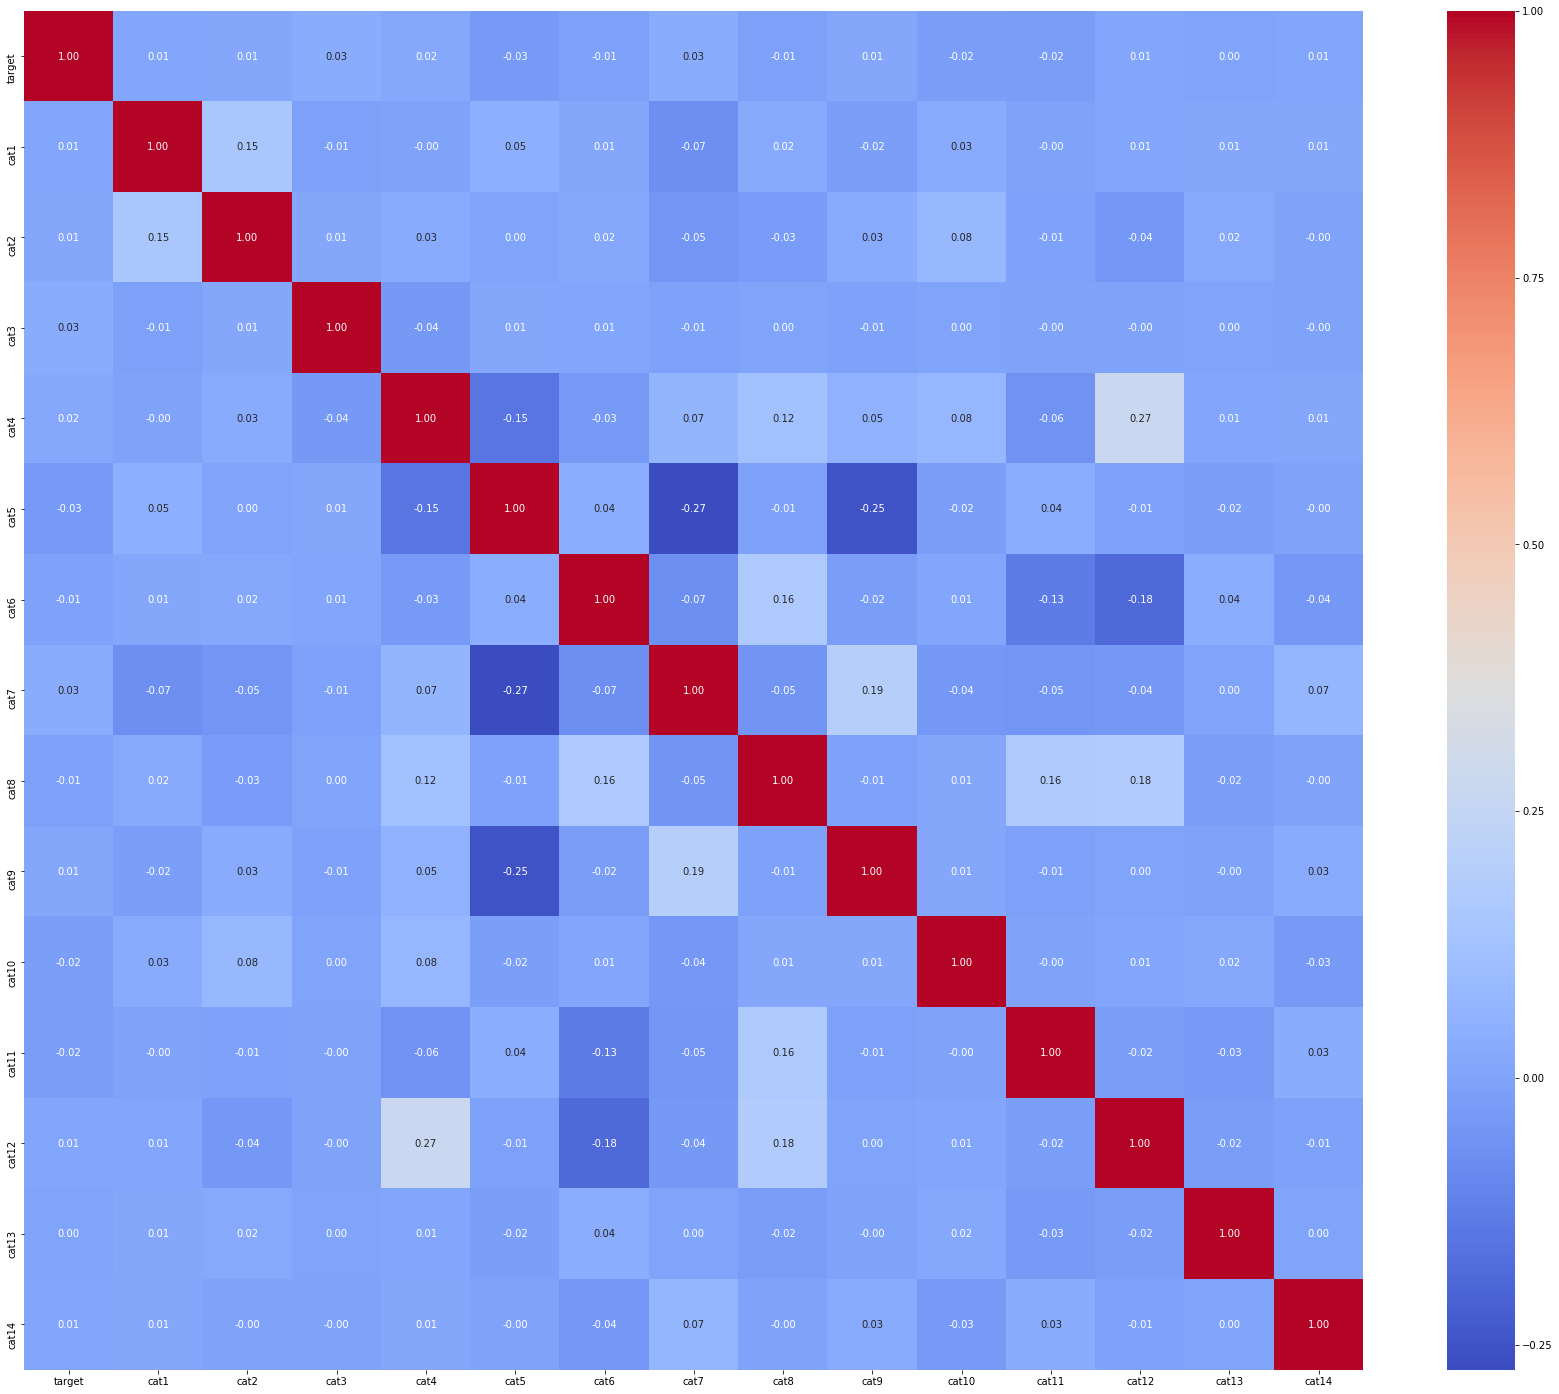

In [69]:
#draw a heatmap between categorical columns and target column to visualize correlation
plt.subplots(figsize=(30,25))
g = sns.heatmap(dataset[['target','cat1','cat2','cat3','cat4','cat5','cat6','cat7','cat8','cat9','cat10','cat11','cat12','cat13','cat14']].corr(),annot=True, fmt = ".2f", cmap = "coolwarm")

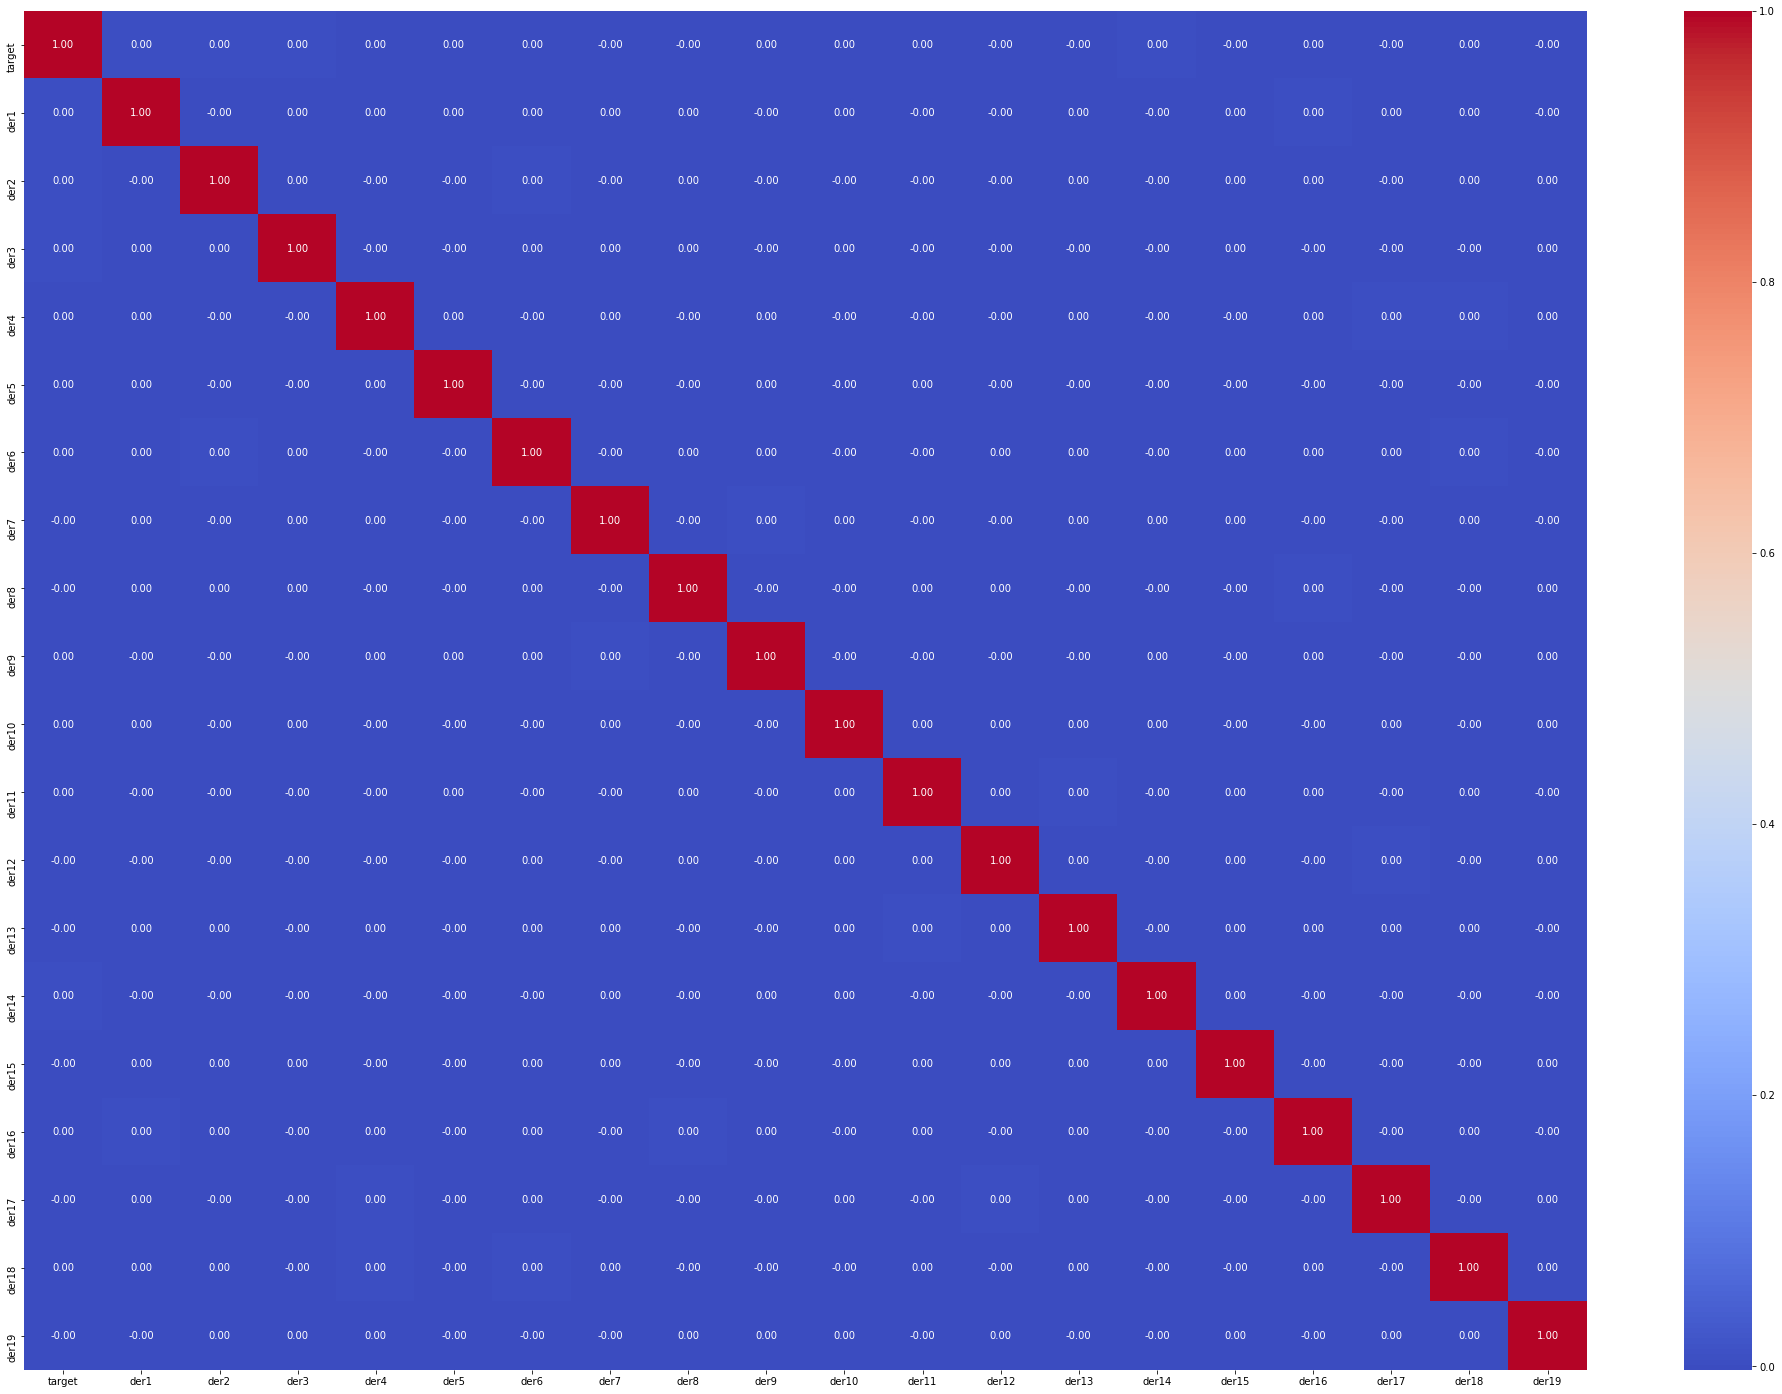

In [70]:
#draw a heatmap between derived columns and target column to visualize correlation
plt.subplots(figsize=(35,25))
g = sns.heatmap(dataset[['target','der1','der2','der3','der4','der5','der6','der7','der8','der9','der10','der11','der12','der13','der14','der15','der16','der17','der18','der19']].corr(),annot=True, fmt = ".2f", cmap = "coolwarm")

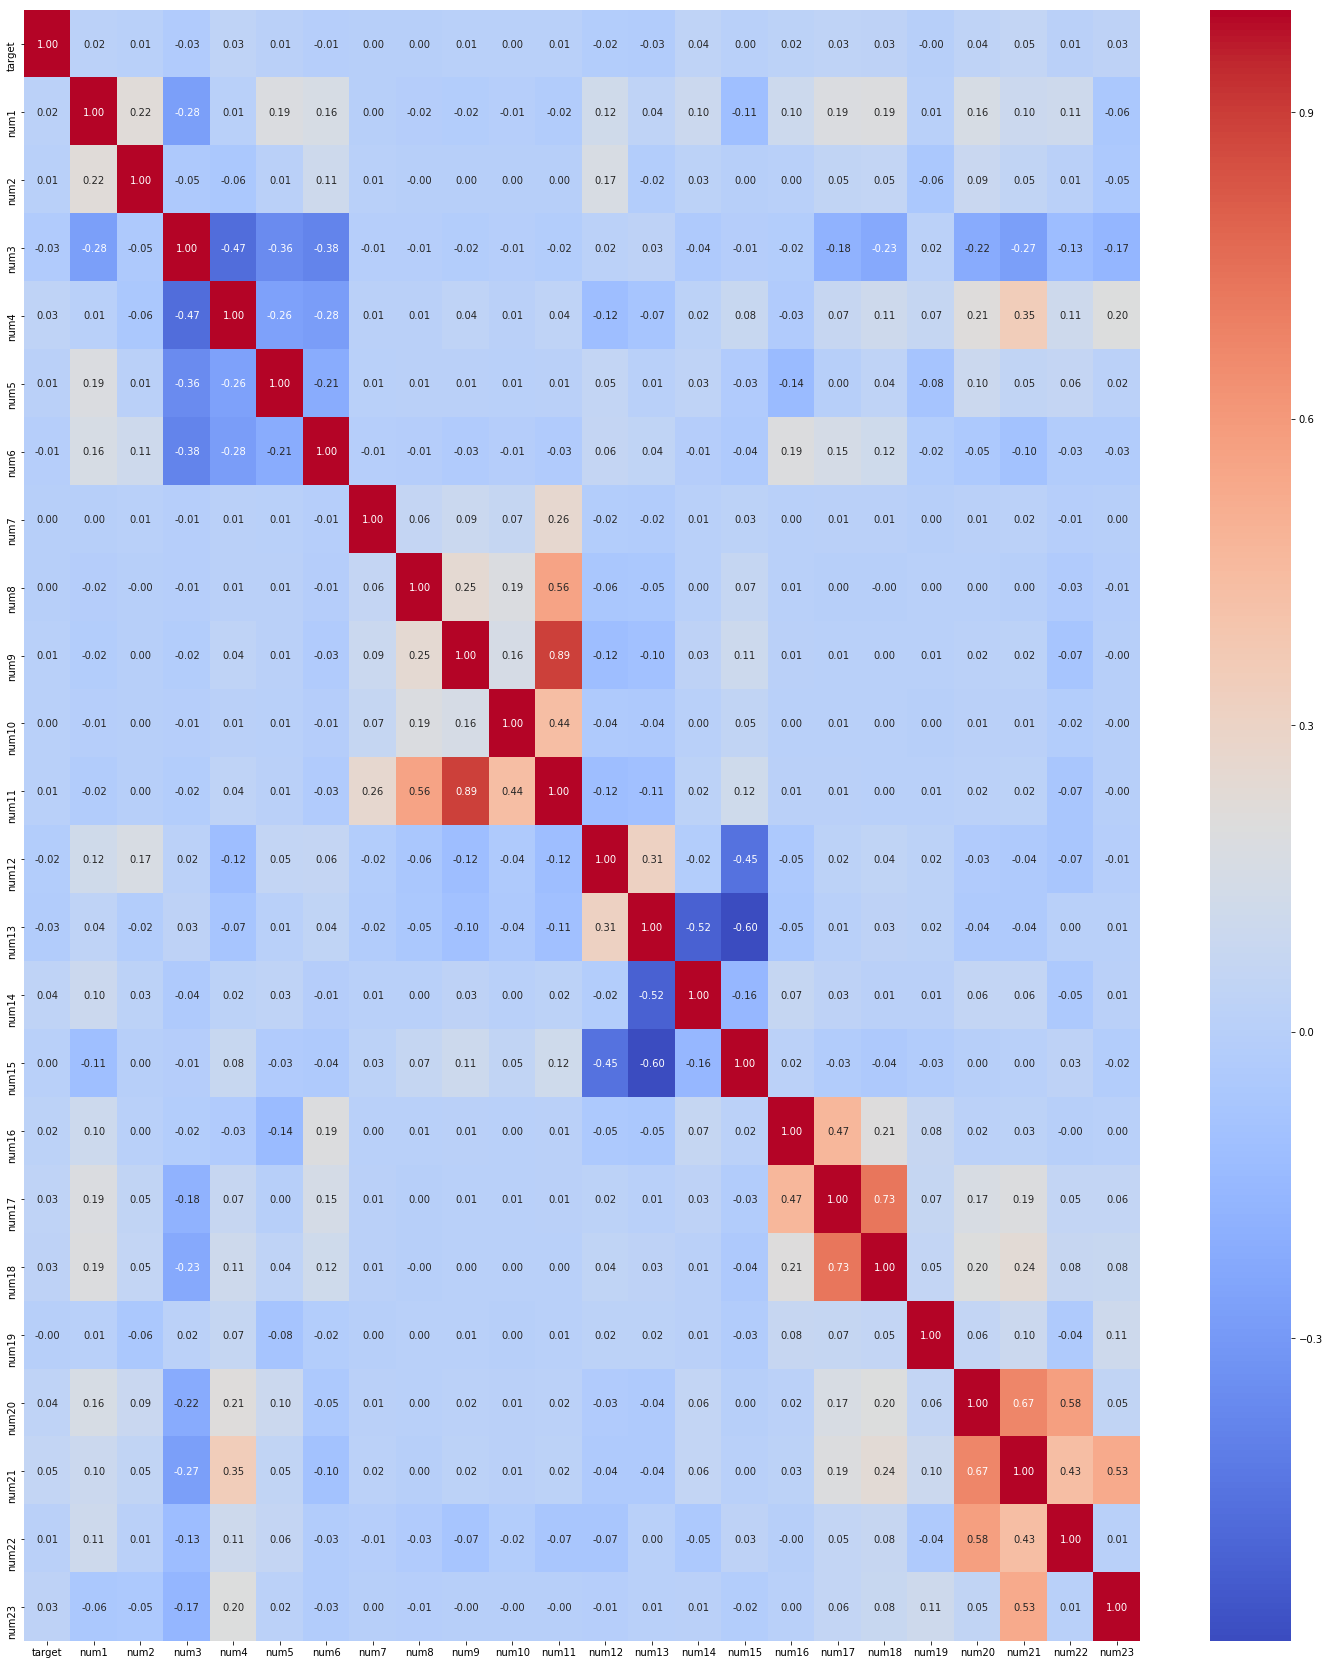

In [71]:
#draw a heatmap between numerical columns and target column to visualize correlation
plt.subplots(figsize=(25,30))
g = sns.heatmap(dataset[['target','num1','num2','num3','num4','num5','num6','num7','num8','num9','num10','num11','num12','num13','num14','num15','num16'
          ,'num17','num18','num19','num20','num21','num22','num23']].corr(),annot=True, fmt = ".2f", cmap = "coolwarm")

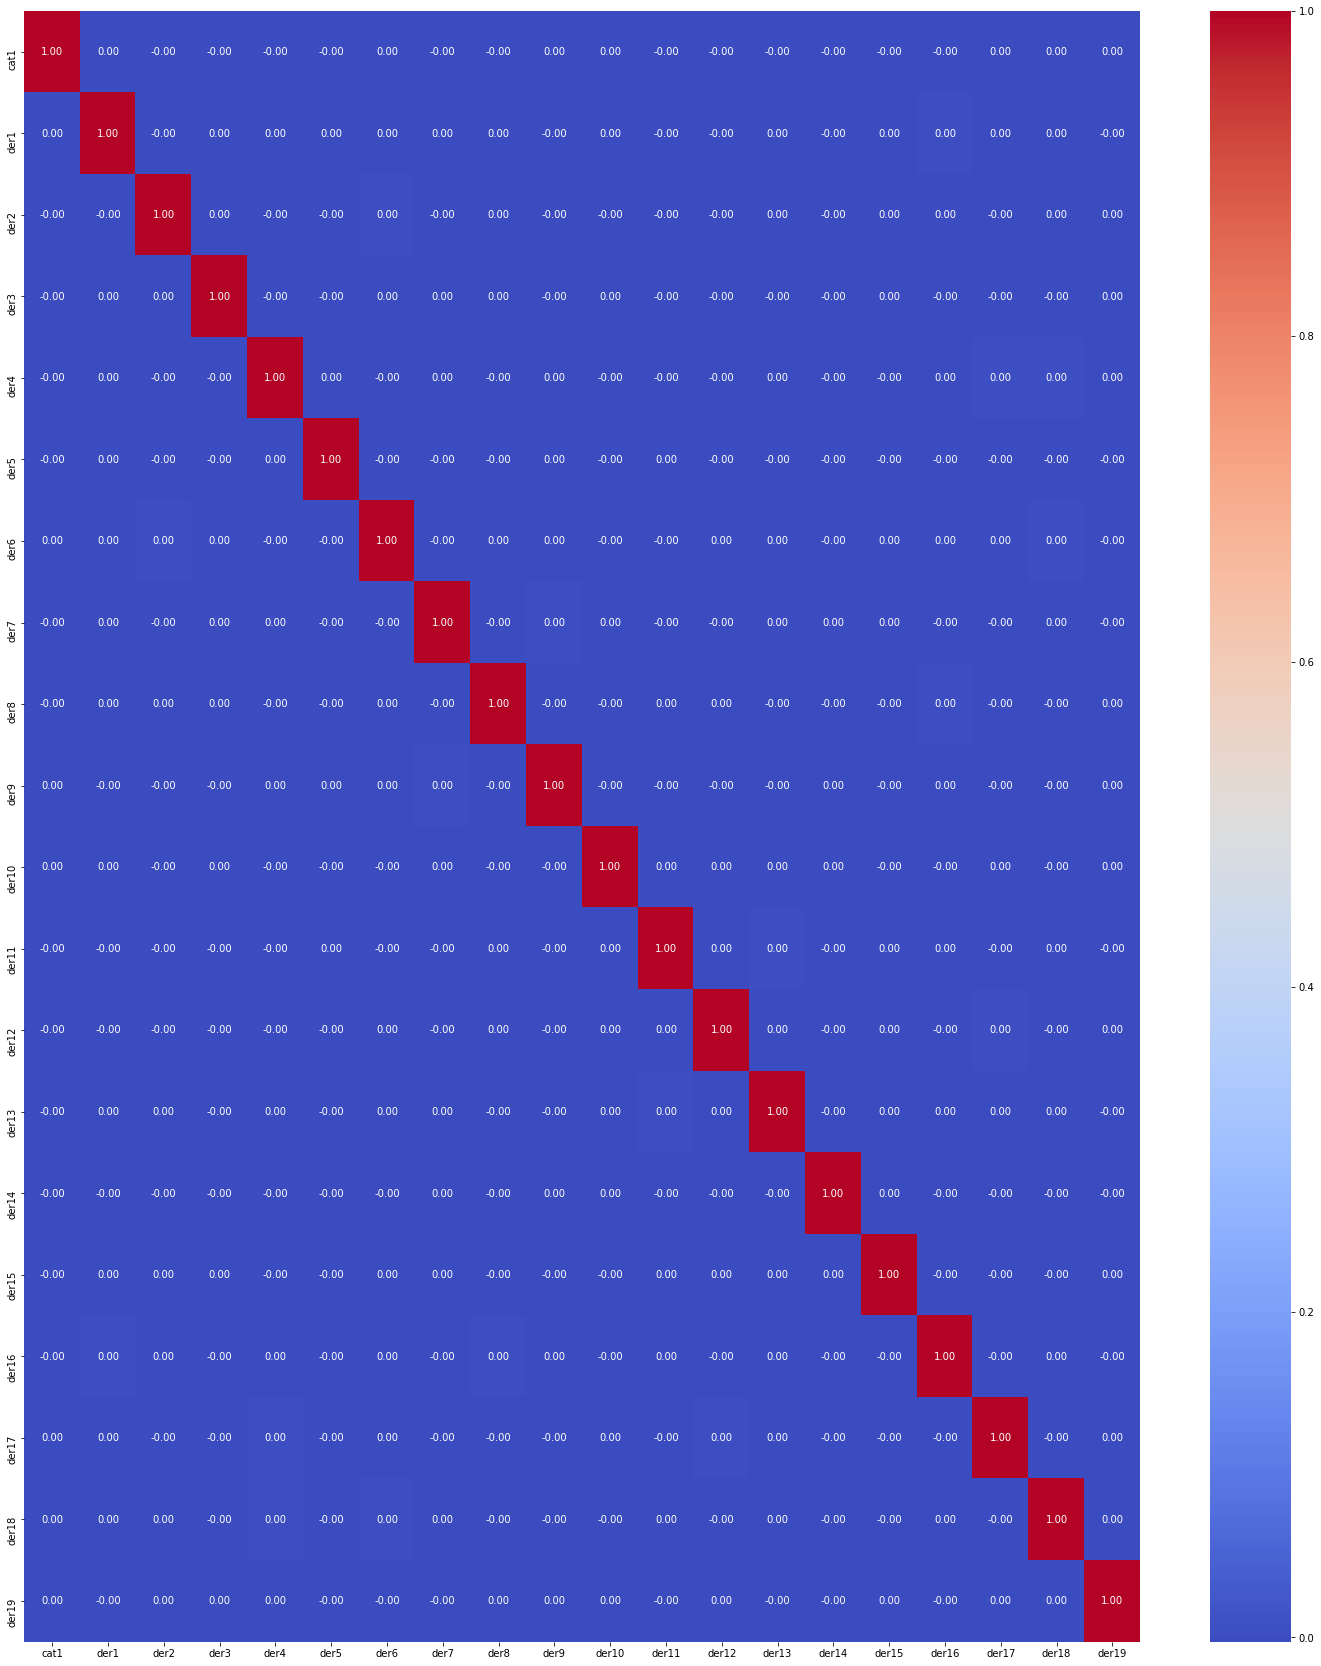

In [72]:
#draw a heatmap between categorical and numerical columns and derived column to visualize correlation and to check if derived 
#columns have been derived from and categorical or numerical columns

plt.subplots(figsize=(25,30))

g = sns.heatmap(dataset[['cat1','der1','der2','der3','der4','der5','der6','der7'
                         ,'der8','der9','der10','der11','der12','der13','der14','der15','der16','der17','der18','der19']].corr(),annot=True, fmt = ".2f", cmap = "coolwarm")

In [73]:
#drop derived columns as they are not correlated with target column
dataset = dataset.drop(labels = onlyder,axis = 1)

In [74]:
#drop id column as it's not required
dataset = dataset.drop(labels = ['id'],axis = 1)

In [75]:
#divide dataset between train and test sets based on length of train data
train = dataset[:train_len]
test = dataset[train_len:]

In [76]:
#check new train data
train.head(5)

,cat1,cat10,cat11,cat12,cat13,cat14,cat2,cat3,cat4,cat5,...,num22,num23,num3,num4,num5,num6,num7,num8,num9,target
0,2.0,1.0,0,0.0,1,12,1.0,0.0,10.0,1.0,...,0.370810,3.605551,0,1,0,0,0,0,0,0.0
1,1.0,1.0,1,2.0,1,19,0.0,0.0,11.0,1.0,...,0.388716,2.449490,0,0,1,0,0,0,0,0.0
2,4.0,1.0,1,2.0,1,60,1.0,0.0,7.0,1.0,...,0.347275,3.316625,0,0,1,0,0,0,0,0.0
3,1.0,1.0,1,3.0,1,104,0.0,0.0,7.0,1.0,...,0.294958,2.000000,1,0,0,0,0,0,0,0.0
4,2.0,1.0,1,2.0,1,82,1.0,0.0,11.0,1.0,...,0.365103,2.000000,1,0,0,0,0,0,0,0.0


In [77]:
#store target column values of train set
Y_train = train["target"]

In [78]:
#check new test data
test.head(5)

,cat1,cat10,cat11,cat12,cat13,cat14,cat2,cat3,cat4,cat5,...,num22,num23,num3,num4,num5,num6,num7,num8,num9,target
596000,1.0,1.0,1,2.0,1,65,1.0,0.0,7.0,1.0,...,0.352136,3.464102,0,1,0,0,0,0,0,NaN
596001,2.0,1.0,1,0.0,1,103,1.0,0.0,4.0,1.0,...,0.358329,2.828427,0,0,0,1,0,0,0,NaN
596002,1.0,1.0,1,2.0,1,29,0.0,0.0,11.0,1.0,...,0.398497,3.316625,0,0,0,1,0,0,0,NaN
596003,1.0,1.0,1,2.0,1,40,0.0,0.0,7.0,1.0,...,0.381445,2.449490,1,0,0,0,0,0,0,NaN
596004,1.0,1.0,1,2.0,1,101,0.0,0.0,11.0,1.0,...,0.385097,3.316625,0,0,0,1,0,0,0,NaN


In [79]:
train_Y=train['target']
#drop target variables from train
train_X = train.drop('target',axis = 1)
#drop target variable from test
test_X=test.drop('target',axis = 1)
test_Y = test['target']

In [80]:
from sklearn.ensemble import RandomForestRegressor
from sklearn.pipeline import make_pipeline
from sklearn.preprocessing import Imputer
from sklearn.model_selection import cross_val_score
import time
start_time = time.time()

#create a pipeline with random forest regressor
my_pipeline = make_pipeline(Imputer(), RandomForestRegressor())
scores = cross_val_score(my_pipeline, train_X, train_Y, scoring='neg_mean_absolute_error')
print(scores)
my_pipeline.fit(train_X, train_Y)
predicted_targets = my_pipeline.predict(test_X)
print("--- %s seconds ---" % (time.time() - start_time))

[-0.08142251 -0.08136312 -0.08138735]
--- 460.97216176986694 seconds ---


In [81]:
#check how many rows have value >=0.5 in target columns
sum(i >=0.5 for i in predicted_targets)

1526

In [82]:
#convert target variables with value >=0.5 to 1
predicted_targets[predicted_targets >= 0.5] = 1

In [83]:
#convert target variables with value <0.5 to 0
predicted_targets[predicted_targets < 0.5] = 0

In [84]:
#re check how many rows have value >=0.5 in target columns
sum(i >=0.5 for i in predicted_targets)

1526

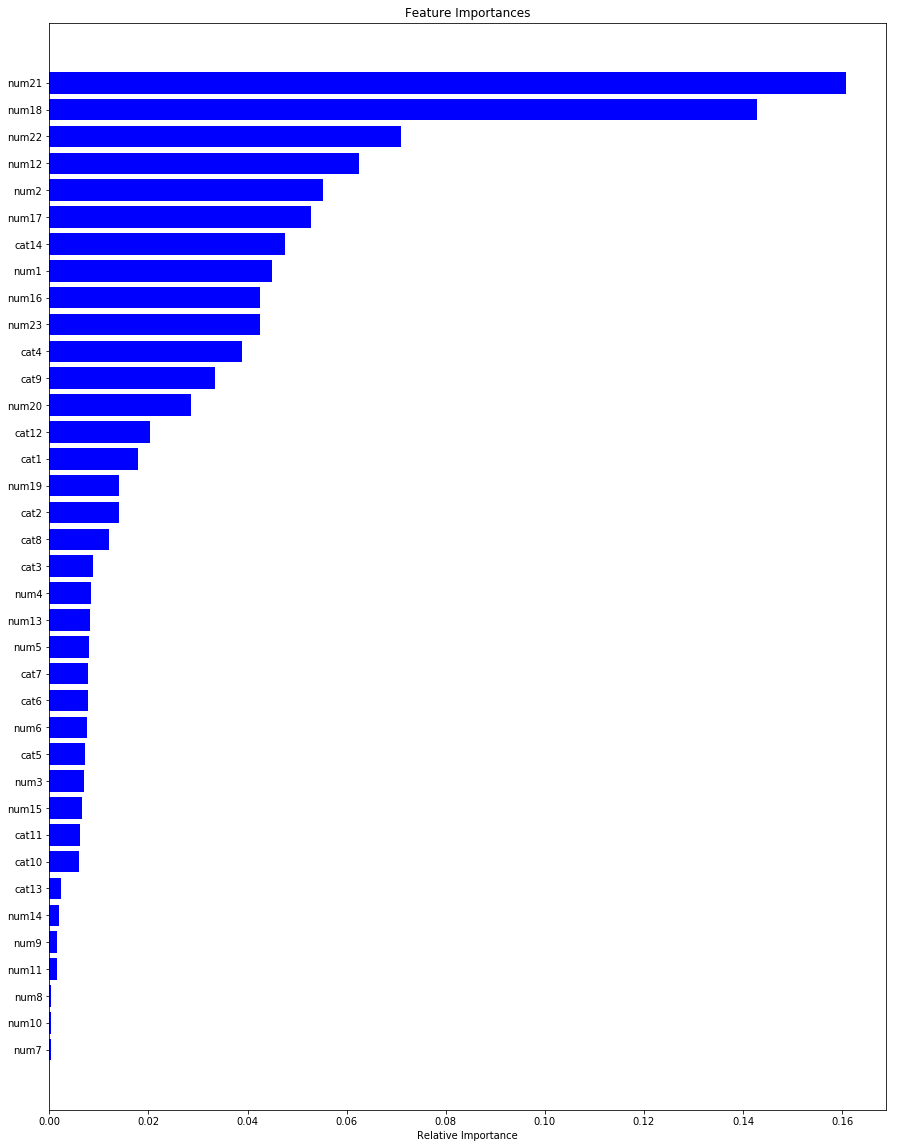

In [85]:
features = list(train_X)
importances = my_pipeline.steps[1][1].feature_importances_
indices = np.argsort(importances)

#draw feature importance plot to see if further feature reduction can be done
plt.subplots(figsize=(15,20))
plt.title('Feature Importances')
plt.barh(range(len(indices)), importances[indices], color='b', align='center')
plt.yticks(range(len(indices)), [features[i] for i in indices])
plt.xlabel('Relative Importance')
plt.show()

In [86]:
#variable to store column names not important
final_cols = ['cat1',
 'cat10',
 'cat11',
 'cat12',
 'cat13',
 'cat14',
 'cat2',
 'cat3',
 'cat4',
 'cat5',
 'cat6',
 'cat7',
 'cat8',
 'cat9',
 'num1',
 'num11',
 'num12',
 'num13',
 'num14',
 'num16',
 'num17',
 'num19',
 'num2',
 'num20',
 'num22',
 'num23',
 'num3',
 'num4',
 'num5',
 'num6',
 'num9']

In [87]:
#fit the pipeline with new data and predict
start_time = time.time()
train_X_final = train.drop(final_cols,axis = 1)
train_X_final = train_X_final.drop(['target'],axis=1)
test_X_final = test.drop(final_cols,axis = 1)
test_X_final = test_X_final.drop(['target'], axis=1)
scores = cross_val_score(my_pipeline, train_X_final, train_Y, scoring='neg_mean_absolute_error')
print(scores)
my_pipeline.fit(train_X_final, train_Y)
targets = my_pipeline.predict(test_X_final)
print("--- %s seconds ---" % (time.time() - start_time))

[-0.07253879 -0.07216603 -0.07261653]
--- 133.92689156532288 seconds ---


In [88]:
#check how many rows have target variable >=0.5
sum(i >=0.5 for i in targets)

9702

In [89]:
#convert target variables with value >=0.5 to 1
targets[targets >= 0.5] = 1

In [90]:
#convert target variables with value >=0.5 to 1
targets[targets < 0.5] = 0

In [91]:
#re check how many rows have target variable >=0.5
sum(i >=0.5 for i in targets)

9702

In [92]:
#create final data frame with id and target columns
final_sub = pd.DataFrame()

final_sub['id'] = ID
final_sub['target'] = targets
final_sub.info()



<class 'pandas.core.frame.DataFrame'>
RangeIndex: 892816 entries, 0 to 892815
Data columns (total 2 columns):
id        892816 non-null int64
target    892816 non-null float64
dtypes: float64(1), int64(1)
memory usage: 13.6 MB


In [93]:
#write final data frame to csv
final_sub.to_csv('final_submission.csv',index=False)